In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import subprocess
#import mplcursors

In [4]:

#string_data = "data"
#for i in range(1):
#    data = np.loadtxt("./data/data_14_"+str(i)+".csv", delimiter=',', dtype=float)
#    plt.plot(data[:,0], data[:,2])
##lt.ylim(-20,20)

[[ 0.01121   0.0134    0.01273  ... -0.01493  -0.008408 -0.01066 ]
 [ 0.009707  0.009827  0.01115  ... -0.007185 -0.006049  0.004795]
 [ 0.01269   0.01025   0.009721 ... -0.01005  -0.02201  -0.01026 ]
 ...
 [ 0.03848   0.03851   0.03854  ...  0.006244  0.006153  0.006063]
 [ 0.0385    0.03853   0.03855  ...  0.006415  0.006325  0.006235]
 [ 0.03852   0.03854   0.03857  ...  0.006588  0.006497  0.006406]]


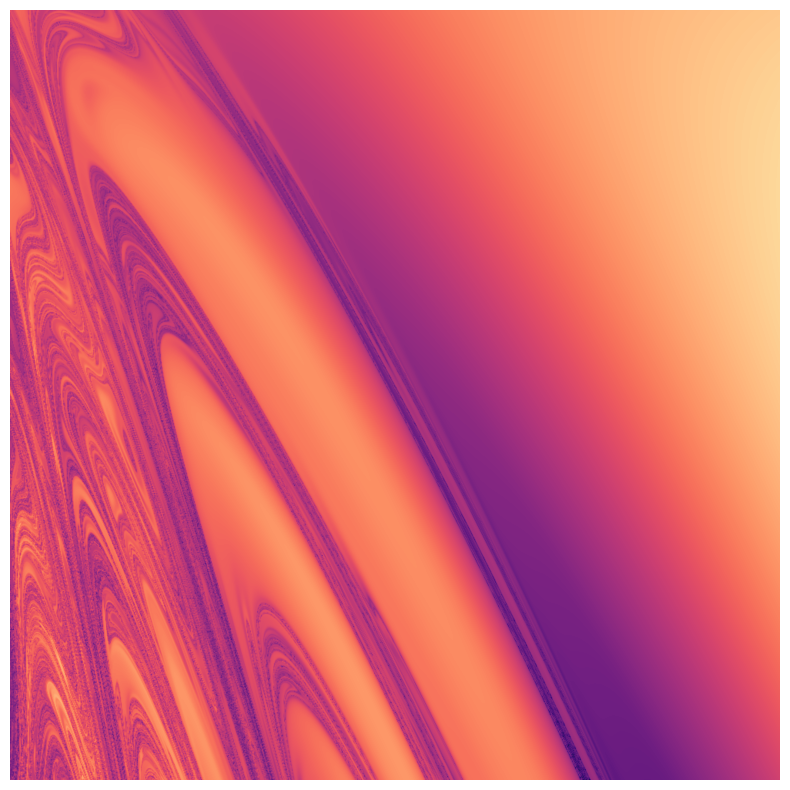

In [84]:
# Activate interactive plots
#%matplotlib widget

# Load the data from the text file
#LCE_1 = np.loadtxt("./data/ll_1.txt")
#LCE_2 = np.loadtxt("./data/ll_2.txt")

LCE_GPU = np.loadtxt("output.txt")
# Define the size of the figure
fig, ax = plt.subplots(figsize=(10, 10))  # Adjust the width and height as needed


print(LCE_GPU)
## plots filled contour plot
# cntr=ax.contourf(samples_K,samples_C,ll_2)
DATA = ax.imshow(LCE_GPU.T,cmap ="magma", vmin = -0.05, vmax = 0.05,interpolation="gaussian")
#ax.set_title('$\\lambda_1$')
ax.set_xlabel('K')
ax.set_ylabel('C')

# Add cursor interaction
#mplcursors.cursor(DATA)
# Remove axes
plt.axis('off')

# Save the figure before displaying
plt.savefig('./LCE_GPU.png', bbox_inches="tight")
plt.show()


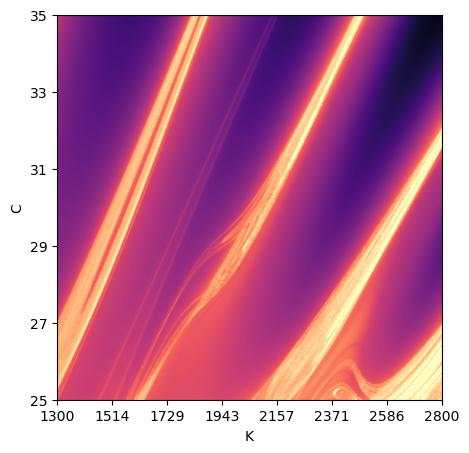

In [2]:
#K_in = 1800
#K_fin = 2100
#C_in = 27
#C_fin = 32

# Prompt the user for input
K_in = 1300
K_fin = 2800
C_in = 25
C_fin = 35

# Specify grid intervals
dx = 200 # Change this to your desired interval for K axis
dy = 2    # Change this to your desired interval for C axis

# Calculate the number of points along each axis
num_points_K = int((K_fin - K_in) / dx) + 1
num_points_C = int((C_fin - C_in) / dy) + 1

# Create grid
K_values = np.linspace(K_in, K_fin, num_points_K)
C_values = np.linspace(C_in, C_fin, num_points_C)

# Create 2D grid using meshgrid
K_grid, C_grid = np.meshgrid(K_values, C_values)


input_str = f"{K_in}\n{K_fin}\n{C_in}\n{C_fin}"

# Execute the precompiled C++ program with the inputs
result = subprocess.run(["./a.out"], input=input_str, text=True, capture_output=True)

# Print the output of the C++ program
fig, ax = plt.subplots(figsize=(5, 5))  # Adjust the width and height as needed


LCE_GPU = np.loadtxt("output.txt")
## plots filled contour plot
# cntr=ax.contourf(samples_K,samples_C,ll_2)
DATA = ax.imshow(LCE_GPU,extent=(K_in, K_fin, C_in, C_fin), origin='lower',cmap ="magma", vmin = -0.1, vmax = 0.05,interpolation="gaussian")
#ax.set_title('$\\lambda_1$')

# Set x-label and y-label with specified ranges and intervals
ax.set_xlabel('K')
ax.set_ylabel('C')

# Create grid lines
ax.set_xticks(K_values)
ax.set_yticks(C_values)

# Add grid lines
#ax.grid(which='both', color='grey', linestyle='-', linewidth=0.5)

ax.set_xlim([K_in, K_fin])
ax.set_ylim([C_in, C_fin])
# Set aspect ratio to equal
ax.set_aspect((K_in - K_fin) / (C_in - C_fin))

# Add cursor interaction
#mplcursors.cursor(DATA)
# Remove axes
#plt.axis('off')

# Save the figure before displaying
plt.savefig('./LCE_GPU.png', bbox_inches="tight")
plt.show()

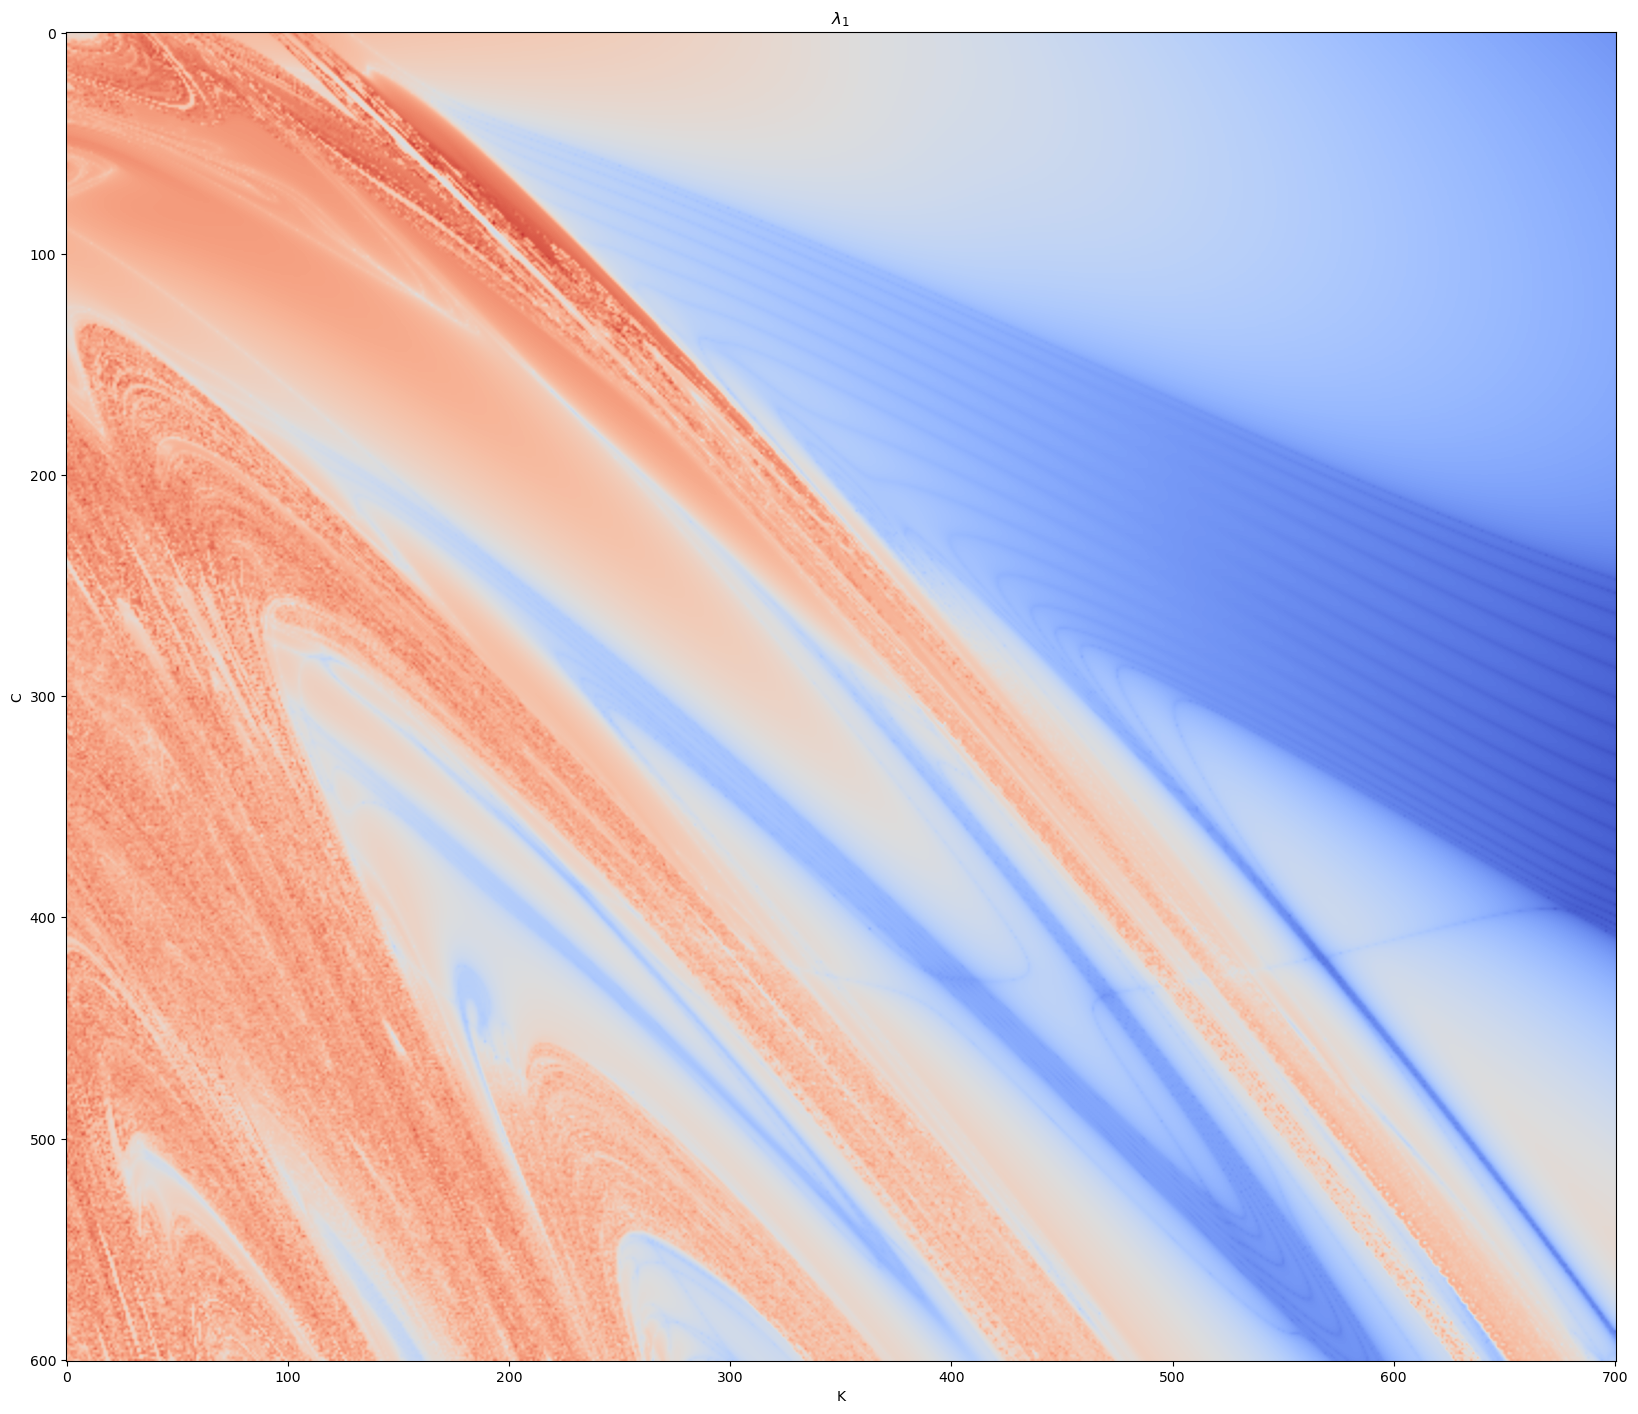

In [73]:
ll_1 = np.loadtxt('ll_1_good.txt')
ll_2 = np.loadtxt('ll_2_good.txt')
# Now 'data' contains the contents of the file 'text.txt'
fig, ax = plt.subplots(figsize=(20, 20))  # Adjust the width and height as needed

#
## plots filled contour plot
#cntr=ax.contourf(samples_K,samples_C,ll_2)
DATA=plt.imshow(ll_1.T,interpolation='gaussian',cmap ="coolwarm")
ax.set_title('$\\lambda_1$')
ax.set_xlabel('K')
ax.set_ylabel('C')

plt.show()